In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


## models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Any results you write to the current directory are saved as output.

test.csv
train.csv



## 1. Explore Titanic data set

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**split train data to features and labels**

In [5]:
train_labels = train['Survived']
train_features = train.drop('Survived', axis=1)
print(train_labels.head(3))
train_features.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**cleaning missing data**

In [6]:
print(train_features.shape)
train_features.isnull().sum()

(891, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin has too many NaN values, so drop it and also drop intuitive unuseful attributes PassengerId Name and Ticket **

In [7]:
train_features = train_features.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)
train_features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

**Do the same for test data**

In [10]:
test = test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

**Now only Age and Embarked have missing values, Show the histogram of age and embarked**
**Becuase age has missing values in 177 rows, so fill any constant value for all 177 rows will impact the result.**
**It is better to generate random number from gaussian distribution**


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


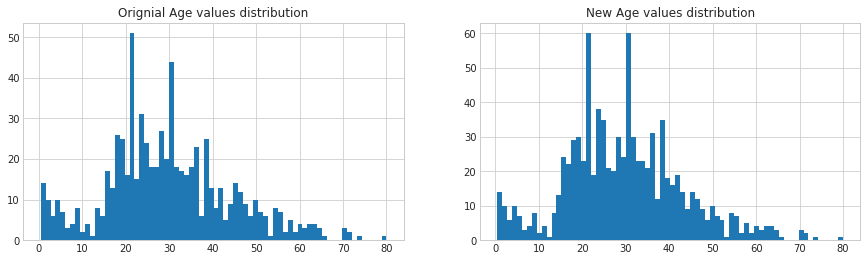

In [14]:
# fill the missing values with the median
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Orignial Age values distribution')
axis2.set_title('New Age values distribution')

# get average, std, and number of NaN values in titanic_df
train_mean_age = train_features["Age"].mean()
train_std_age = train_features["Age"].std()
count_NaN_age = train_features["Age"].isnull().sum()

# Generate random numbers between (mean -std) & (mean + std)
rand_NaN_age = np.random.randint(train_mean_age - train_std_age, train_mean_age + train_std_age, size = train_features['Age'].isnull().sum())

## plot original Age Values
## NOTE: drop all null values, and convrt to int
train_features['Age'].dropna().hist(bins=70, ax=axis1)

## fill NaN values in age column withrandom vlaues generated
train_features['Age'][np.isnan(train_features['Age'])] = rand_NaN_age

#plot new Age age values
train_features['Age'].hist(bins=70, ax=axis2)

In [15]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(train_features, train_labels)

Y_pred = random_forest.predict(test)

random_forest.score(train_features, train_labels)

ValueError: could not convert string to float: 'Q'